In [139]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
import pathlib
from matplotlib.ticker import LogLocator

In [140]:
fig_width = 6  # inches
fig_height = 4.5  # inches
fig_dpi = 350

plt.rcParams.update({
    'figure.figsize': (fig_width, fig_height),
    'figure.dpi': fig_dpi,

    # Fonts
    'font.size': 22,

    # Axes
    'axes.labelsize': 22,
    'axes.titlesize': 22,  # Increase this value for larger axes titles
    'axes.linewidth': 1,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 1,
    'grid.color': 'gray',

    # Legend
    'legend.fontsize': 16,
    'legend.frameon': True,
    'legend.framealpha': 0.8,
    'legend.fancybox': False,
    'legend.edgecolor': 'gray',
    'legend.facecolor': 'white',
    'legend.borderaxespad': 0.5,
    'legend.borderpad': 0.4,
    'legend.labelspacing': 0.5,

    # Lines
    'lines.linewidth': 3,
    'lines.markersize': 8,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
})

In [141]:
cancer_path = "/export/usuarios_ml4ds/lbartolome/Repos/my_repos/CASE/notebooks/results_cancer_NORM.pkl"
ai_path = "/export/usuarios_ml4ds/lbartolome/Repos/my_repos/CASE/notebooks/results_ai_NORM.pkl"
data_cancer = pickle.load(open(cancer_path, "rb"))
data_ai = pickle.load(open(ai_path, "rb"))

In [142]:
path_cancer = pathlib.Path("/export/usuarios_ml4ds/jarenas/github/IntelComp/ITMT/topicmodeler/WP6models_old/TMmodels/OA_cancer_25tpc/TMmodel/alphas.npy")
path_ai = pathlib.Path("/export/usuarios_ml4ds/jarenas/github/IntelComp/ITMT/topicmodeler/WP6models_old/TMmodels/OA_Kwds3_AI_25tpc/TMmodel/alphas.npy")

topic_size_cancer = np.load(path_cancer).tolist()
topic_size_ai = np.load(path_ai).tolist()

In [143]:
llama_s3 = [topic['llama3.1:8b-instruct-q8_0']['s3'] for topic in data_cancer.values()]
gpt_s3 = [topic['gpt-4o-2024-08-06']['s3'] for topic in data_cancer.values()]

llama_s3 = [topic['llama3.1:8b-instruct-q8_0']['s3'] for topic in data_ai.values()]
gpt_s3 = [topic['gpt-4o-2024-08-06']['s3'] for topic in data_ai.values()]

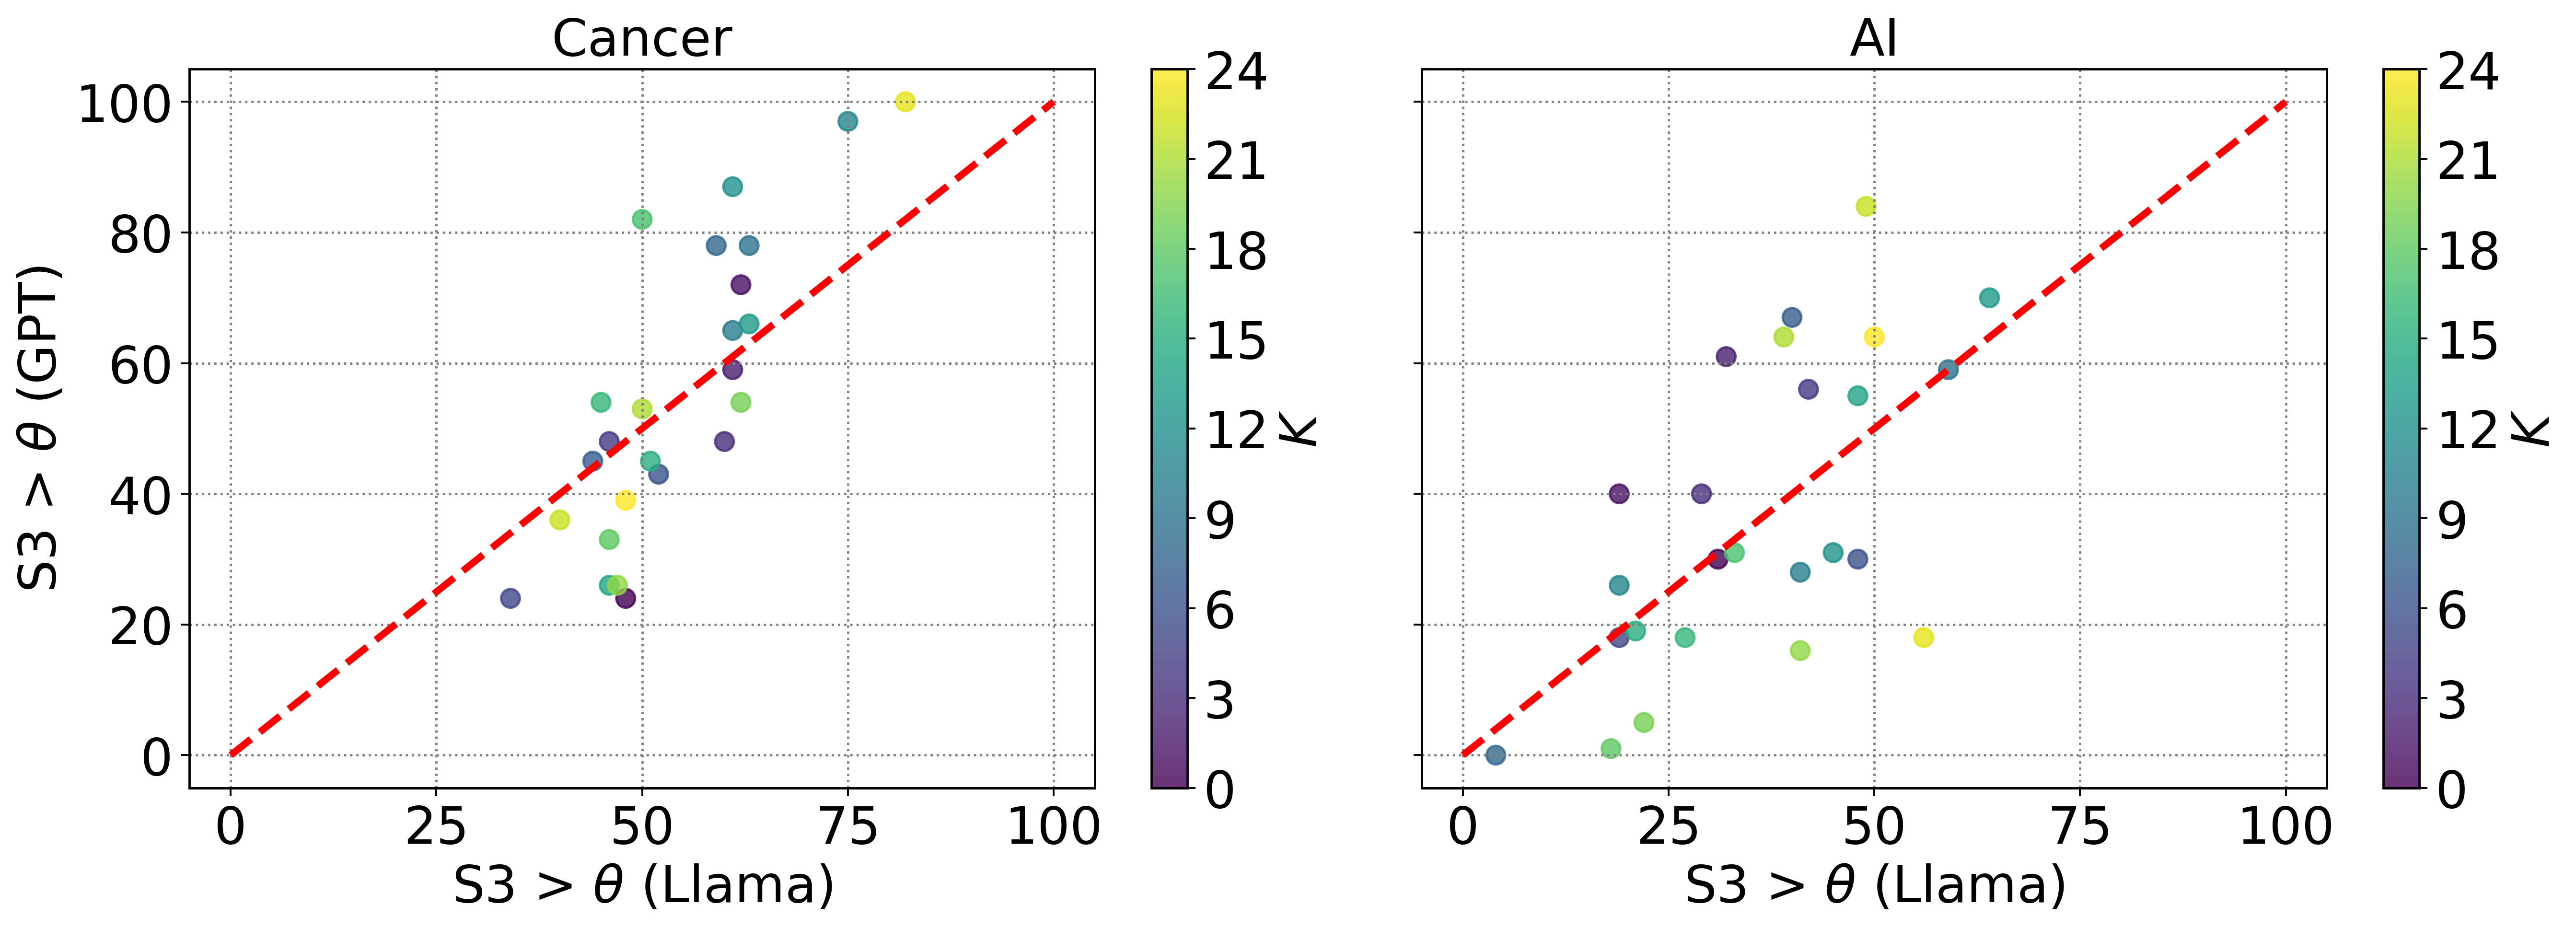

In [144]:
llama_s3 = [topic['llama3.1:8b-instruct-q8_0']['s3'] for topic in data_cancer.values()]
gpt_s3 = [topic['gpt-4o-2024-08-06']['s3'] for topic in data_cancer.values()]

llama_s3 = [topic['llama3.1:8b-instruct-q8_0']['s3'] for topic in data_ai.values()]
gpt_s3 = [topic['gpt-4o-2024-08-06']['s3'] for topic in data_ai.values()]

# Ajustar los datos de ejemplo con índices alineados de 0 a 24
topic_indices = np.arange(0, 25)  # Índices de 0 a 24

# Crear colores para los gráficos alineados con los índices
colors_cancer = topic_indices  # Usar los índices directamente como colores
colors_ai = topic_indices  # Mismo rango para "ai"

# Configurar subplots para mostrar "cancer" y "ai" lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --- Gráfico para "cancer" ---
llama_s3 = [topic['llama3.1:8b-instruct-q8_0']['s3'] for topic in data_cancer.values()]
gpt_s3 = [topic['gpt-4o-2024-08-06']['s3'] for topic in data_cancer.values()]
scatter_cancer = axes[0].scatter(
    llama_s3, gpt_s3, c=colors_cancer, cmap='viridis', alpha=0.8
)
axes[0].plot([0, 100], [0, 100], 'r--', label='Línea de igualdad')
axes[0].set_title('Cancer')
axes[0].set_xlabel('S3 > $\\theta$ (Llama)')
axes[0].set_ylabel('S3 > $\\theta$ (GPT)')
axes[0].grid(True)

# Barra de colores para "cancer"
cbar_cancer = fig.colorbar(
    scatter_cancer, ax=axes[0], orientation='vertical'
)
cbar_cancer.set_label('$K$')
cbar_cancer.set_ticks(topic_indices[::3])  # Cada 3 tópicos
cbar_cancer.set_ticklabels(topic_indices[::3])  # Etiquetas de los índices

# --- Gráfico para "ai" ---
llama_s3 = [topic['llama3.1:8b-instruct-q8_0']['s3'] for topic in data_ai.values()]
gpt_s3 = [topic['gpt-4o-2024-08-06']['s3'] for topic in data_ai.values()]
scatter_ai = axes[1].scatter(
    llama_s3, gpt_s3, c=colors_ai, cmap='viridis', alpha=0.8
)
axes[1].plot([0, 100], [0, 100], 'r--', label='Línea de igualdad')
axes[1].set_title('AI')
axes[1].set_xlabel('S3 > $\\theta$ (Llama)')
axes[1].grid(True)

# Barra de colores para "ai"
cbar_ai = fig.colorbar(
    scatter_ai, ax=axes[1], orientation='vertical'
)
cbar_ai.set_label('$K$')
cbar_ai.set_ticks(topic_indices[::3])  # Cada 3 tópicos
cbar_ai.set_ticklabels(topic_indices[::3])  # Etiquetas de los índices

# Ajustar diseño
plt.tight_layout()
plt.show()


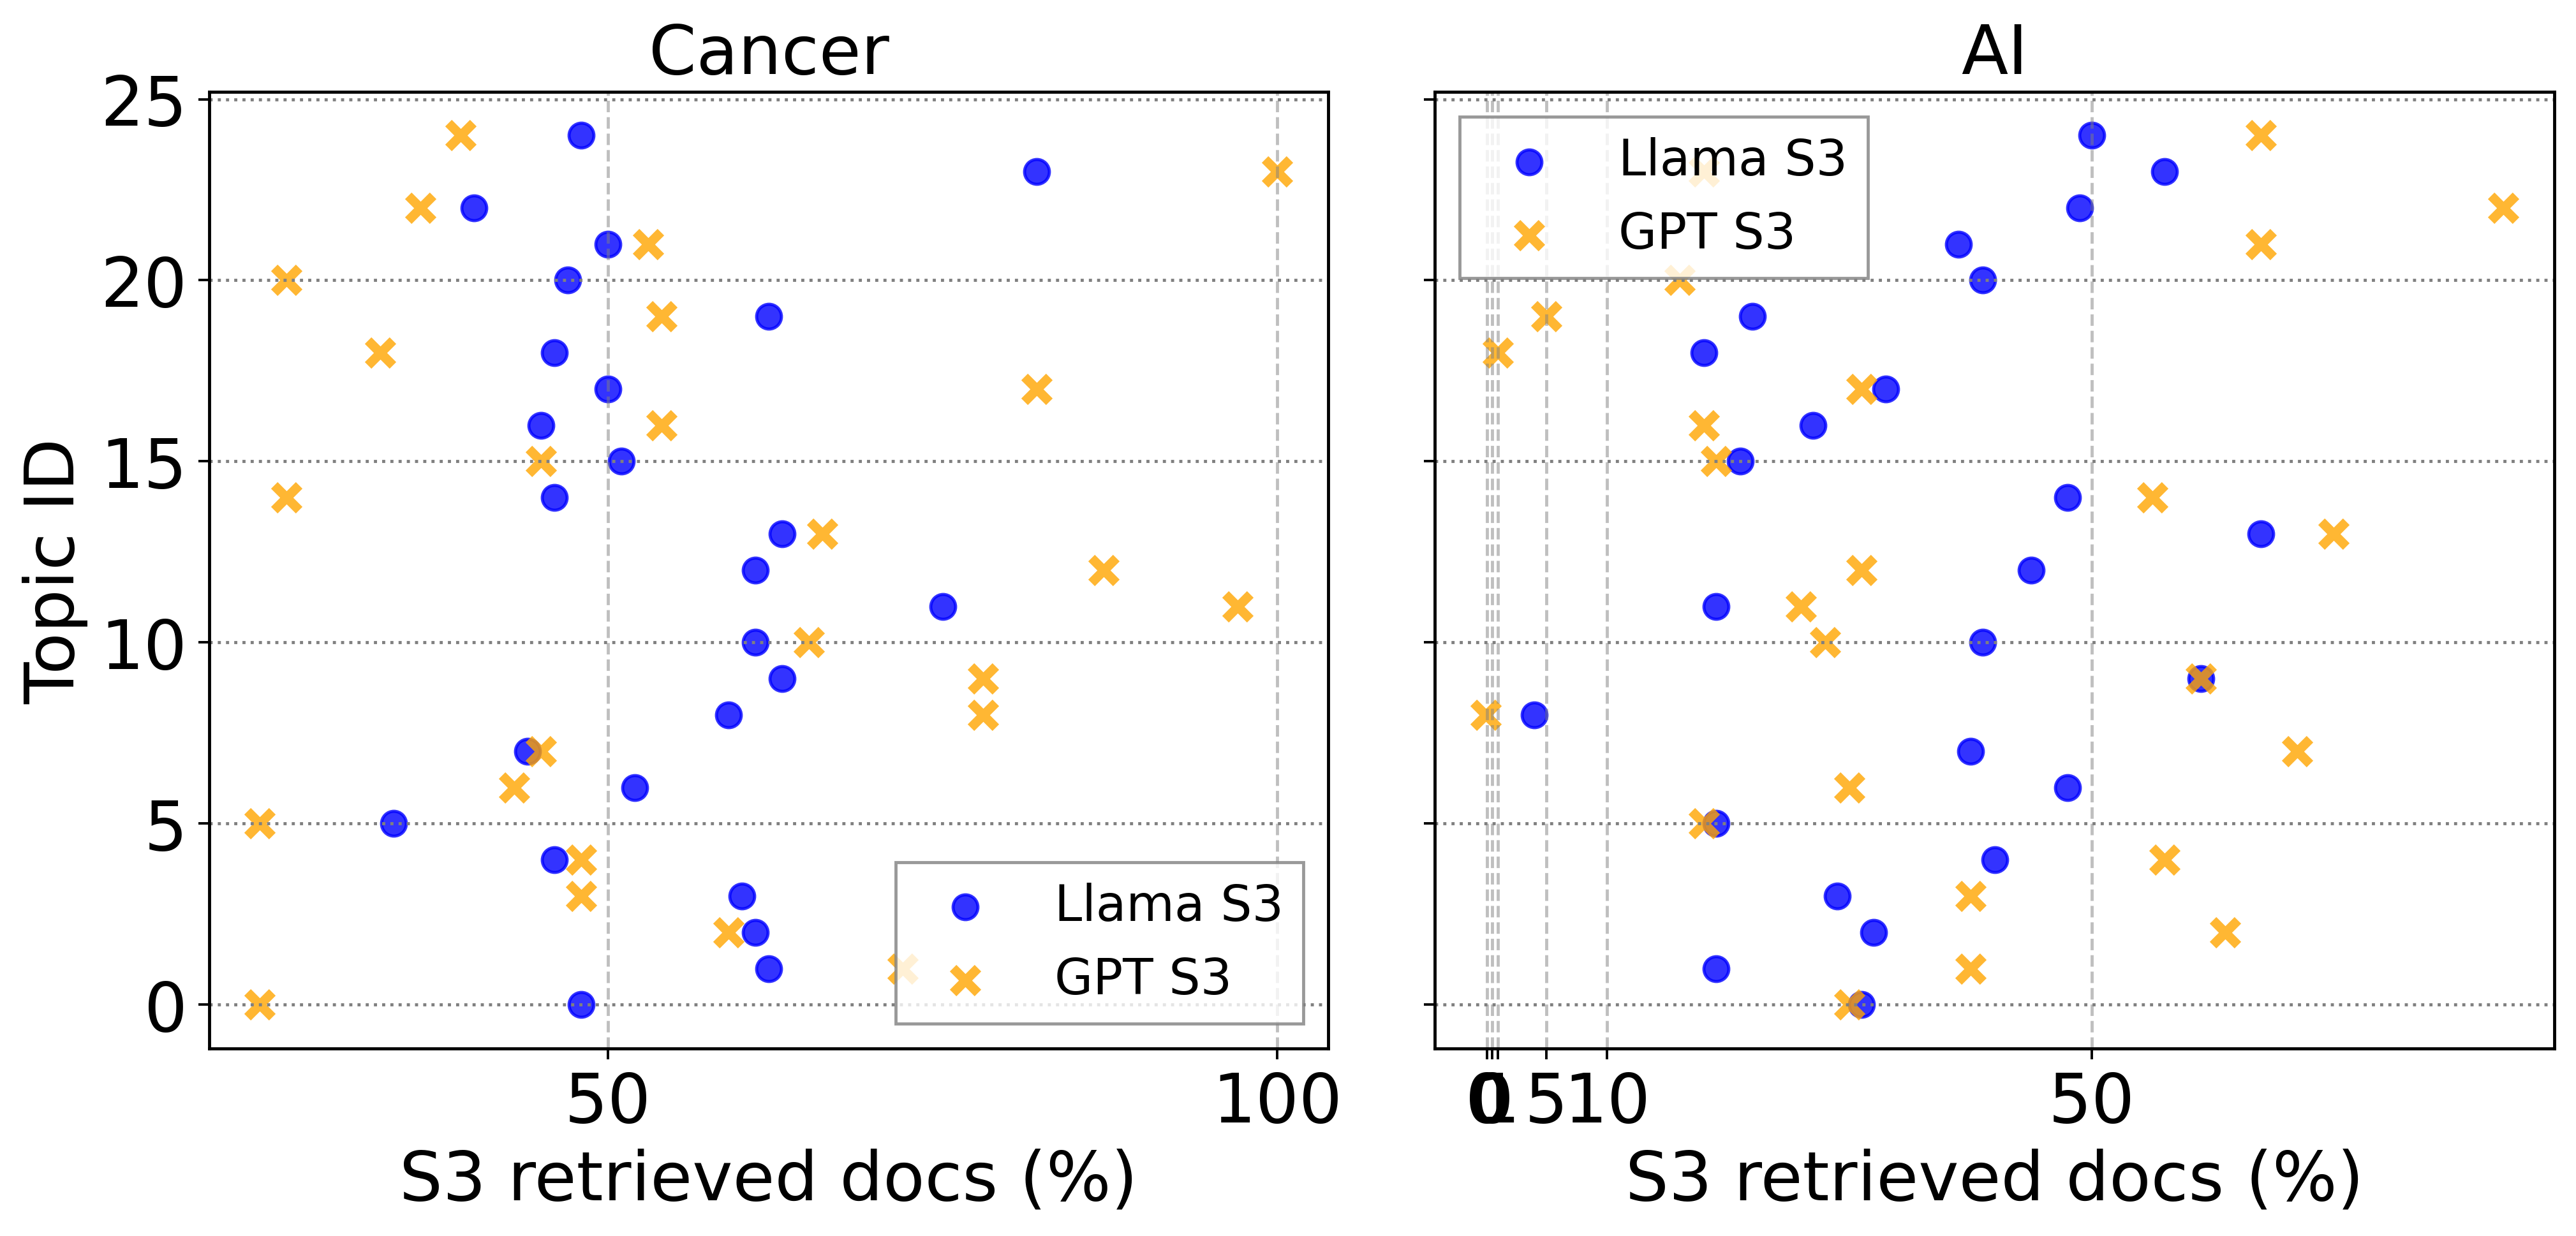

In [145]:
def extract_s3(data):
    topic_ids = list(data.keys())
    llama_s3 = [topic['llama3.1:8b-instruct-q8_0']['s3'] for topic in data.values()]
    gpt_s3 = [topic['gpt-4o-2024-08-06']['s3'] for topic in data.values()]
    return topic_ids, llama_s3, gpt_s3

# Obtener datos para cancer y ai
cancer_ids, cancer_llama_s3, cancer_gpt_s3 = extract_s3(data_cancer)
ai_ids, ai_llama_s3, ai_gpt_s3 = extract_s3(data_ai)

# Crear subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# --- Gráfico para "cancer" ---
axes[0].scatter(cancer_llama_s3, cancer_ids, color='blue', alpha=0.8, label='Llama S3', marker='o')
axes[0].scatter(cancer_gpt_s3, cancer_ids, color='orange', alpha=0.8, label='GPT S3', marker='x')
axes[0].set_title('Cancer')
axes[0].set_xlabel('S3 retrieved docs (%)')
axes[0].set_ylabel('Topic ID')
axes[0].invert_yaxis()  # Para que el ID de tópico vaya en orden ascendente
axes[0].grid(True, axis='x', linestyle='--', alpha=0.5)
axes[0].legend()

axes[0].xaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0, 5.0], numticks=4))



# --- Gráfico para "ai" ---
axes[1].scatter(ai_llama_s3, ai_ids, color='blue', alpha=0.8, label='Llama S3', marker='o')
axes[1].scatter(ai_gpt_s3, ai_ids, color='orange', alpha=0.8, label='GPT S3', marker='x')
axes[1].set_title('AI')
axes[1].set_xlabel('S3 retrieved docs (%)')
axes[1].invert_yaxis()  # Para que el ID de tópico vaya en orden ascendente
axes[1].grid(True, axis='x', linestyle='--', alpha=0.5)
axes[1].legend()

axes[1].xaxis.set_major_locator(LogLocator(base=10.0, subs=[1.0, 5.0], numticks=4))


# Ajustar diseño
plt.tight_layout()
plt.show()

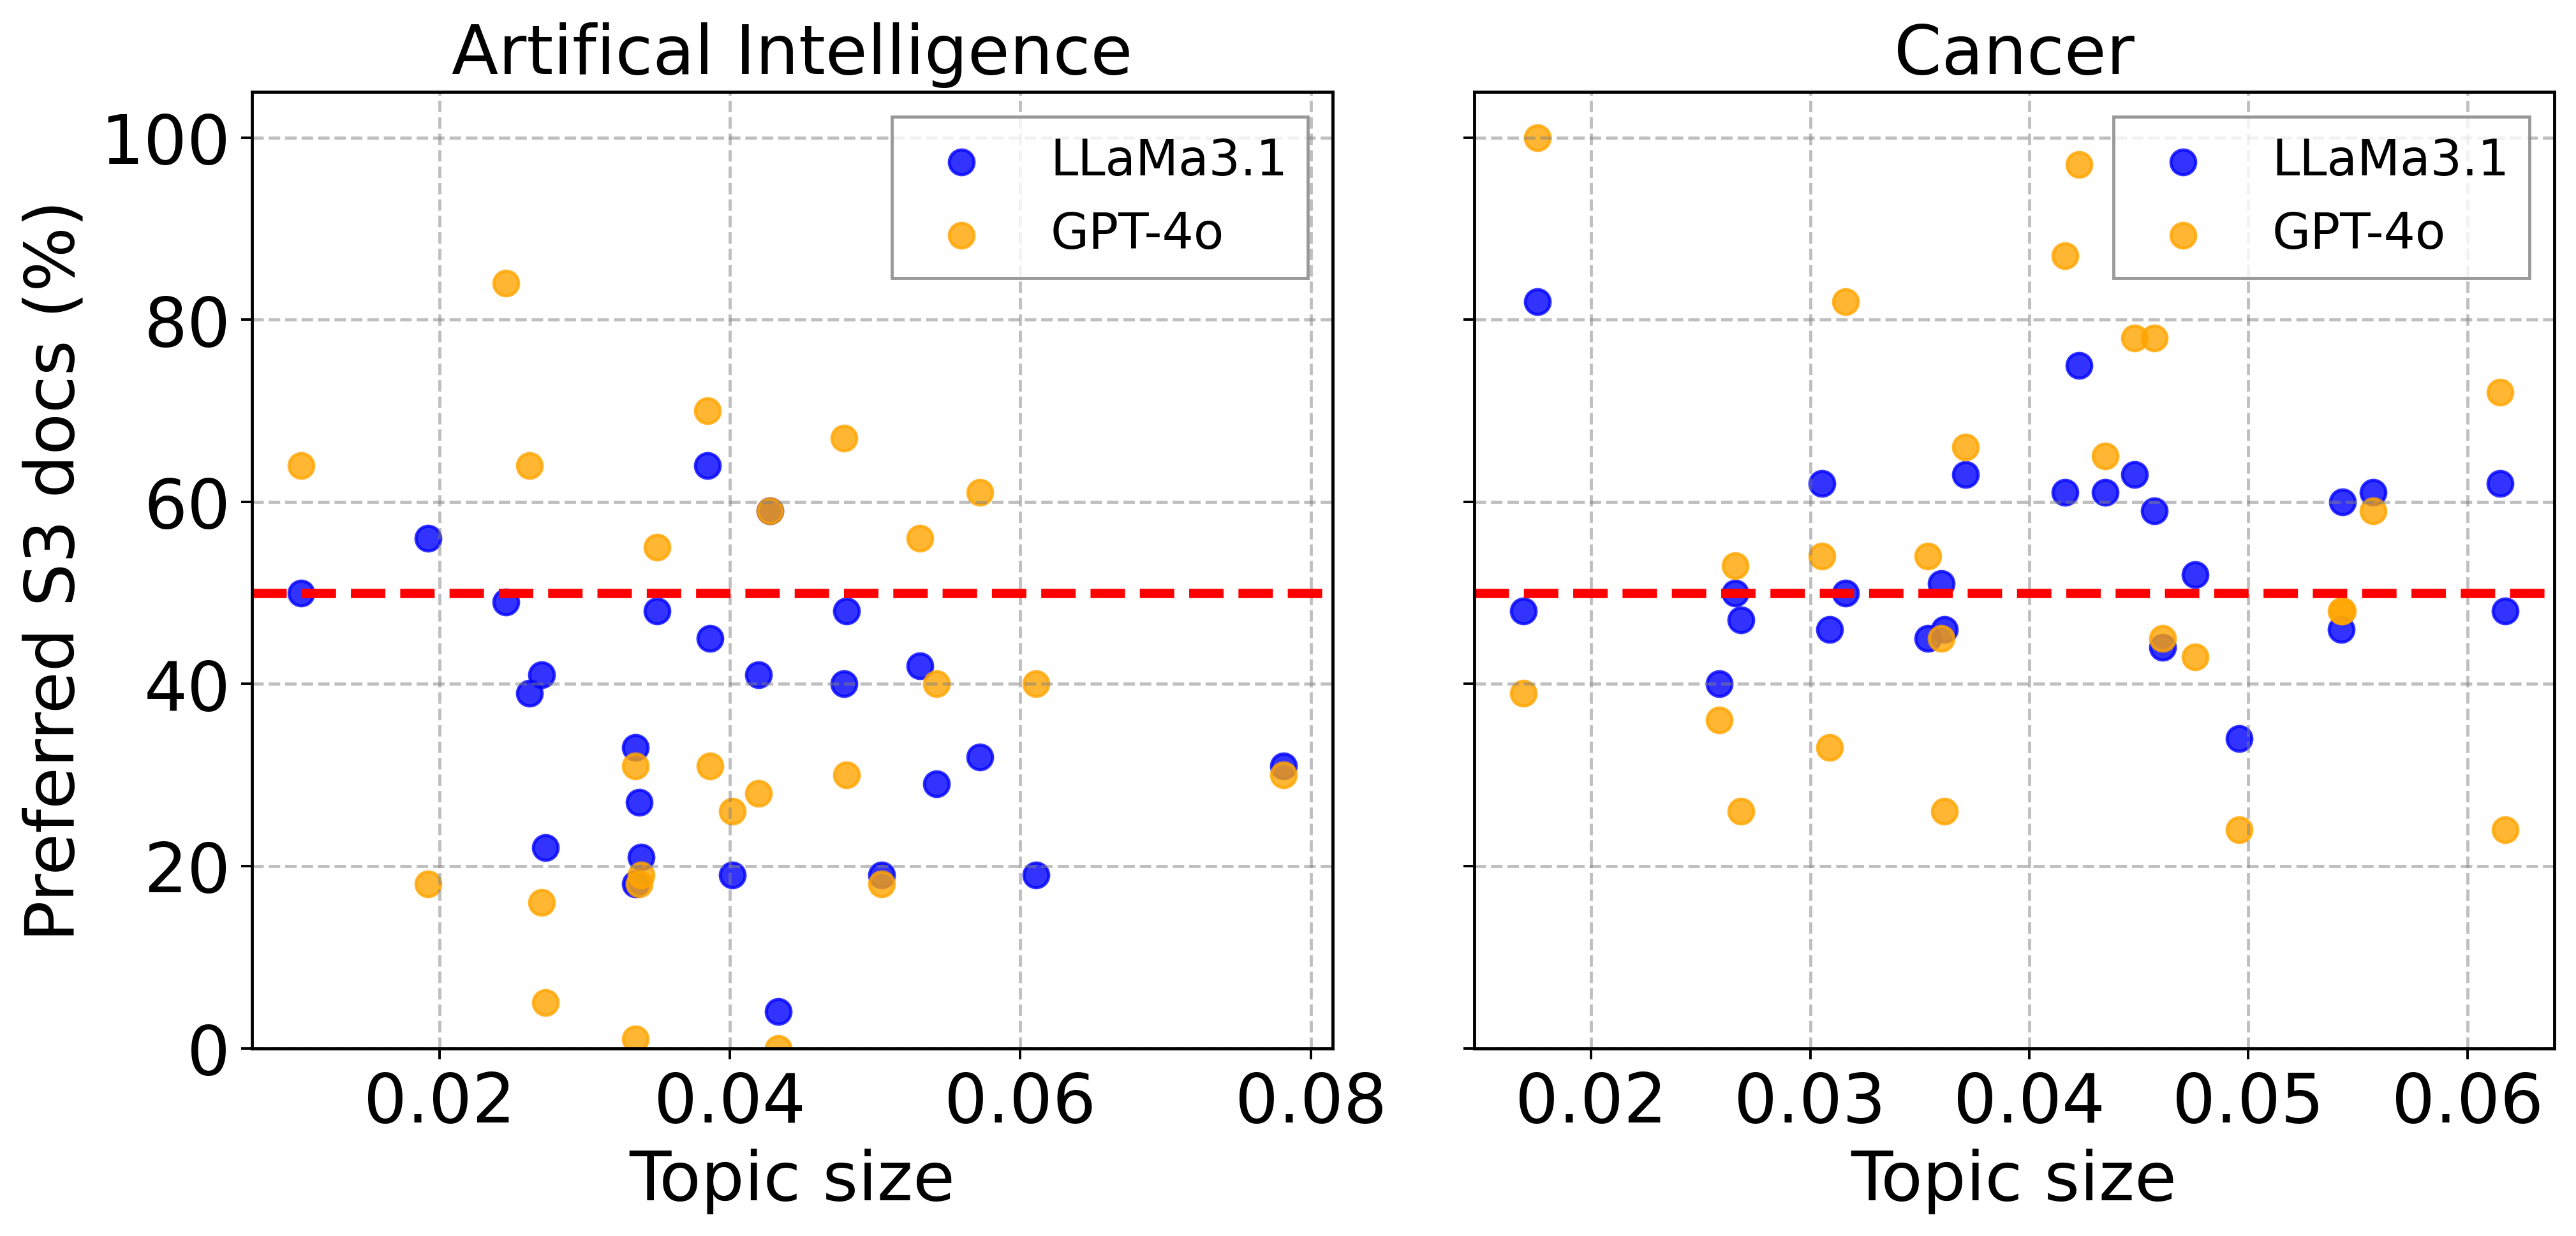

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# --- Gráfico para "cancer" ---
axes[1].scatter(topic_size_cancer, cancer_llama_s3, color='blue', alpha=0.8, label='LLaMa3.1')
axes[1].scatter(topic_size_cancer, cancer_gpt_s3, color='orange', alpha=0.8, label='GPT-4o')
axes[1].set_title('Cancer')
axes[0].set_ylabel('Preferred S3 docs (%)')
axes[1].set_xlabel('Topic size')
#plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha="right")  # Rotar etiquetas
axes[1].set_ylim(0, 105)
axes[1].grid(True, axis='both', linestyle='--', alpha=0.5)
# Add a red dashed line at y=50
axes[1].axhline(y=50, color='red', linestyle='--')
axes[1].legend()

# --- Gráfico para "ai" ---
axes[0].scatter(topic_size_ai, ai_llama_s3, color='blue', alpha=0.8, label='LLaMa3.1')
axes[0].scatter(topic_size_ai, ai_gpt_s3, color='orange', alpha=0.8, label='GPT-4o')
axes[0].set_title('Artificial Intelligence')
axes[0].set_xlabel('Topic size')
#plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha="right")  # Rotar etiquetas
axes[0].set_ylim(0, 105)
axes[0].grid(True, axis='both', linestyle='--', alpha=0.5)
# Add a red dashed line at y=50
axes[0].axhline(y=50, color='red', linestyle='--')
axes[0].legend()

# Ajustar diseño
plt.tight_layout()
plt.savefig("evaluation_llama.png", dpi=300, bbox_inches='tight')
plt.show()